# Business Understanding

*I work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:*

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.




In [1]:
#Importcthe required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting decimal format
pd.set_option('display.float_format',  '{:,.2f}'.format)
#to maximize the display of data 
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 30)

In [3]:
#Loading the given dataset
file_path = 'loan.csv'
#coverting the dataset in to dataframe and using low_memory flag because data types are not specified
dataframe = pd.read_csv(file_path, low_memory=False)
#identifying the shape of dataframe
dataframe.shape

(39717, 111)

In [4]:
#displaying the dataframe
dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/br...,Borrower added on 12/22/...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/br...,Borrower added on 12/22/...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/br...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/br...,Borrower added on 12/21/...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,Na

As we have loaded the given data and converted it into data frame as our next step we have to identify the number of null values that are present in the given dataset which is done below.

In [5]:
#identifying the number of missing values in dataframe
print(dataframe.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [6]:
#for better understanding covert the number of null values to % of null values in each column
nullpercent = round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2)
nullpercent[ nullpercent > 0].astype(str) + '%'

emp_title                          6.19%
emp_length                         2.71%
desc                              32.58%
title                              0.03%
mths_since_last_delinq            64.66%
mths_since_last_record            92.99%
revol_util                         0.13%
last_pymnt_d                       0.18%
next_pymnt_d                      97.13%
last_credit_pull_d                 0.01%
collections_12_mths_ex_med         0.14%
mths_since_last_major_derog       100.0%
annual_inc_joint                  100.0%
dti_joint                         100.0%
verification_status_joint         100.0%
tot_coll_amt                      100.0%
tot_cur_bal                       100.0%
open_acc_6m                       100.0%
open_il_6m                        100.0%
open_il_12m                       100.0%
open_il_24m                       100.0%
mths_since_rcnt_il                100.0%
total_bal_il                      100.0%
il_util                           100.0%
open_rv_12m     

We see that there are many columns which have null values and few columns are having huge number of null values which might alter the data analysis. In order to overcome that let us consider removing columns which have more than 25% of null values.

In [7]:
#Removing all the columns that consist of more than 25% of null values.
dataframe.drop(nullpercent[ nullpercent > 25 ].index, axis=1, inplace=True)
#checking how much data is present after deleting the null values from dataframe
dataframe.shape

(39717, 53)

After removing the columns which are having more than 25% of null values we have only 53 columns left.
Now Let us further cleanse the dataframe to make it more reliable for analysis.

We know that unique values also will not contribute anything to the analysis rather than making the plots as mess. In order to avoid that we will now find out and remove the unique values from the dataframe.

In [8]:
#Finding out the number of unique values in the dataframe (columns)
dataframe.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [9]:
#drop the fields if they have only one unique value
dataframe.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)
#again check the shape of dataframe
dataframe.shape

(39717, 44)

Now let us check the fields which have most number of unique values and make a decision whether the fields are helpful for us or not.

In [10]:
#Checking for number(max) of unique values
dataframe.nunique().sort_values(ascending=False).head(20)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
dtype: int64

As already seen we have ***id, url, member_id*** which are having highest unique values and according to business description all the three fields depict only one thing which is their customer so to simplify the data further we can consider one field and remove the other two, and also we can see the fields such as ***emp_title, title*** have most unique values so let us remove them.


NOTE: You might get a doubt that why are we not considering ***desc*** as it also has high unique values. The reason for not cosnidering  the desc is, it has the date on which the customer was added which will be helpful in our data analysis.

In [11]:
#Removing the fields emp_title, title
dataframe.drop(['emp_title', 'title', 'id', 'url'], axis=1, inplace=True)
#Checking the shape of dataframe
dataframe.shape

(39717, 40)

Now let us find out which data is relevant to us and which is not, because according to the business problem statement we have to perform analysis for providing better loans by avoiding the credit loss for which all the data which is present might not be required. So, let us check the available data and simply remove the data which is irrelevant to us for performing the analysis.

In [12]:
#Checking what all are the columns that are present in our dataframe
print(dataframe.columns.tolist())

['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']


By seeing the data dictionary and understanding the variables we can now identify which variables are not relevant to us. I consider the variables ***total_rec_int, total_rec_prncp, total_rec_late_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv, last_pymnt_amnt*** as irrelevant because all these variables are only applicable if a person has already taken a loan. we can also see few more variables such as ***recoveries, collection_recovery_fee*** which are only applicable when the loan is charged off according to the business workflow and these variable are no use to our analysis.

In [13]:
#Deleting the variables which are no use for our analysis
dataframe.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)
#Checking the shape of dataframe
dataframe.shape

(39717, 30)

As we have filtered and removed the unnecessary data, to make sure we are ready to go with the analysis let us just recheck whether there are any other missing values in the datafram which might effect our analysis.

In [14]:
#for better understanding covert the number of null values to % of null values in each column
nullpercent = round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2)
nullpercent[ nullpercent > 0].astype(str) + '%'

emp_length              2.71%
revol_util              0.13%
pub_rec_bankruptcies    1.75%
dtype: object

We still see there are very few null values in some variables so let us just remove those rows from the dataframe so that we will not have any null value errors.

In [15]:
#deleting the rows which have null values
dataframe.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Checking if there are any other null values
nullpercent = round(100*(dataframe.isnull().sum()/len(dataframe.index)), 2)
nullpercent[ nullpercent > 0].astype(str) + '%'
#Checking the shape of dataframe
dataframe.shape

(37898, 30)

Now let us see the variables that are present and identify if they are any variables that have grouped or ungrouped values.

In [16]:
#Finding out the number of unique values in the dataframe
dataframe.nunique().sort_values().head(20)

term                      2
loan_status               3
verification_status       3
pub_rec_bankruptcies      3
home_ownership            4
pub_rec                   5
grade                     7
inq_last_6mths            9
emp_length               11
delinq_2yrs              11
purpose                  14
sub_grade                35
open_acc                 38
addr_state               49
issue_d                  52
total_acc                81
int_rate                337
earliest_cr_line        514
zip_code                809
loan_amnt               869
dtype: int64

When we further check the variables we see the variable ***loan_status, verification_status*** have 3 unique values and out of which we dont require two values from each, which are current under the loan status as the loan is still open and source verified under the verification status it is similar to verified.

In [17]:
#leaving the current loan status rows
dataframe = dataframe[dataframe.loan_status != 'Current']
#leaving the source verified verification status rows
dataframe = dataframe[dataframe.loan_status != 'Source Verified']
#Checking the shape of dataframe
dataframe.shape

(36800, 30)

Now check whether the unique(string) values are having any empty spaces or unused string words and if yes remove them becuase that is basic.

In [18]:
#Seeing the unique values in term 
dataframe.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
#Removing the space using strip as we see the term has string unique values and has an empty space before its start
dataframe['term'] = dataframe.term.str.strip()
dataframe.term.unique()
#Checking the shape of dataframe
dataframe.shape

(36800, 30)

In [20]:
#describe the data for better understanding
dataframe.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
count,"36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00","36,800.00"
mean,"851,783.58","11,149.54","10,880.79","10,439.06",324.91,"69,434.48",13.33,0.15,0.87,9.30,0.05,"13,373.77",22.15,"12,000.65","11,525.59",0.04
std,"252,927.87","7,369.86","7,109.16","7,008.52",208.89,"64,021.59",6.65,0.49,1.07,4.38,0.24,"15,848.56",11.41,"8,854.57","8,710.30",0.20
min,"80,364.00",500.00,500.00,0.00,16.08,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00
25%,"667,834.00","5,500.00","5,400.00","5,000.00",167.73,"41,133.00",8.22,0.00,0.00,6.00,0.00,"3,728.75",14.00,"5,572.03","5,274.42",0.00
50%,"843,748.00","10,000.00","9,600.00","9,000.00",280.11,"60,000.00",13.43,0.00,1.00,9.00,0.00,"8,867.50",20.00,"9,815.27","9,357.34",0.00
75%,"1,039,827.25","15,000.00","15,000.00","14,350.00",429.37,"83,000.00",18.59,0.00,1.00,12.00,0.00,"17,028.00",29.00,"16,303.69","15,619.73",0.00
max,"1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"58,563.68","58,563.68",2.00


When we see the above output we can clearly tell that entire data ia not being displayed and this is because describe() cannot be used on variables that have any prefix or suffix which make them unable for calculations. Let us check the data and remove any such anomalies. We also find ***issue_d and earliest_cr_line*** which is a date variable but is in string format let us covert that into date format and create derived columns with that data so that we can analyze further by using months if required.

In [21]:
#removing the suffix(%) for variables int_rate and  revol_util and using float data type for them
dataframe['int_rate'] = dataframe.int_rate.str.strip('%').astype(float)
dataframe['revol_util'] = dataframe.revol_util.str.strip('%').astype(float)
#converting the variables issue_d and earliest_cr_line to date type
dataframe['issue_d'] = pd.to_datetime(dataframe.issue_d, format='%b-%y')
dataframe['earliest_cr_line'] = pd.to_datetime(dataframe.earliest_cr_line, format='%b-%y')
#checking the data types of all the variables
dataframe.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

Now let us derive the year month date from the date format that we have created and these additional variables are called as derived variables.

In [22]:
#deriving year,month,weekday from issue_d 
dataframe['issue_d_year'] = dataframe.issue_d.dt.year
dataframe['issue_d_month'] = dataframe.issue_d.dt.strftime('%b')
dataframe['issue_d_weekday'] = dataframe.issue_d.dt.weekday
#as year and week day can be as object we covert their dataframe types
dataframe['issue_d_year'] = dataframe['issue_d_year'].astype(object)
dataframe['issue_d_weekday'] = dataframe['issue_d_weekday'].astype(object)

#deriving year,month,weekday from earliest_cr_line
dataframe['earliest_cr_line_year'] = dataframe.earliest_cr_line.dt.year
dataframe['earliest_cr_line_month'] = dataframe.earliest_cr_line.dt.strftime('%b')
#as year can be as object we covert it's dataframe types
dataframe['earliest_cr_line_year'] = dataframe['earliest_cr_line_year'].astype(object)

For further analysis we need the amount of loan that is being sactioned when a customer applies and what is the profit and loss of each such customer so let us derive them.

In [23]:
#Identifying the profit and loss, and creating a variable
dataframe['Profit_Loss']=(dataframe['total_pymnt']-dataframe['funded_amnt'])*100/dataframe['funded_amnt']
#Calculating the percentage of loan amounts that are being sactioned by the company
dataframe['amnt_approved'] = round(dataframe.funded_amnt_inv*100/dataframe.loan_amnt,2)
#checking whether the created variables are included into the dataframe or not
dataframe.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,Profit_Loss,amnt_approved
0,1296599,5000,5000,"4,975.00",36 months,10.65,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,"5,863.16","5,833.84",0.00,2011,Dec,3,1985,Jan,17.26,99.50
1,1314167,2500,2500,"2,500.00",60 months,15.27,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,"1,008.71","1,008.71",0.00,2011,Dec,3,1999,Apr,-59.65,100.00
2,1313524,2400,2400,"2,400.00",36 months,15.96,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,"3,005.67","3,005.67",0.00,2011,Dec,3,2001,Nov,25.24,100.00
3,1277178,10000,10000,"10,000.00",36 months,13.49,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,"12,231.89","12,231.89",0.00,2011,Dec,3,1996,Feb,22.32,100.00
5,1311441,5000,5000,"5,000.00",36 months,7.90,156.46,A,A4,3 years,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,"5,632.21","5,632.21",0.00,2011,Dec,3,2004,Nov,12.64,100.00


Now as we see the above dataframe which is neat and clean we are good to go with the analysis.

# Univariate Analysis

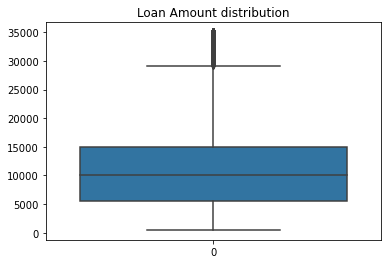

In [24]:
#Box plot for loan amount variable
sns.boxplot(data=dataframe.loan_amnt)
#title for the boxplot
plt.title('Loan Amount distribution')
plt.show()

**Observation:** The loan amount is varying in the range of 0 to 35,000 while having the mean value of 10,000.

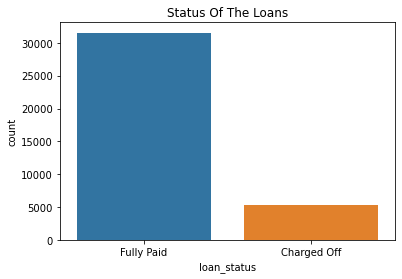

Fully Paid     31534
Charged Off     5266
Name: loan_status, dtype: int64

In [25]:
# countplot for loan status to see their ratio
sns.countplot(x= dataframe["loan_status"])
plt.title('Status Of The Loans')
plt.show()
dataframe["loan_status"].value_counts()

**Observation:** We can clearly see that most of the loans are paid on time but still we find approzimately 14.3% of loans which are charged of which creates an imabalance here. 

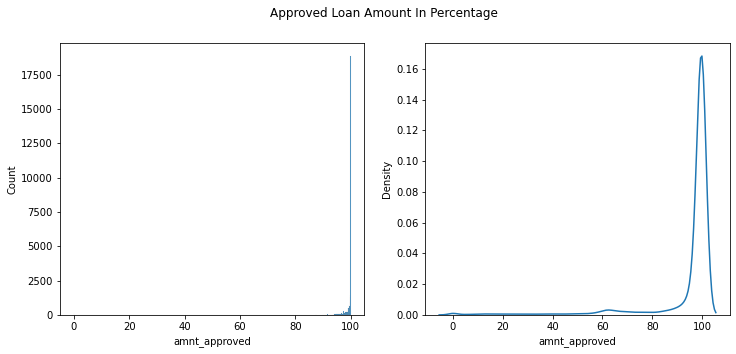

In [26]:
#let us use KDE and histplot to identify the distribution amounts
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x = dataframe["amnt_approved"])
plt.subplot(1,2,2)
sns.kdeplot(x = dataframe["amnt_approved"])
plt.suptitle('Approved Loan Amount In Percentage')
plt.show()

**Observation:** From the above plot we can clearly see there is a huge spike at 100% which means the lending club is almost sactioning 100% of loan amount to which their customers apply.

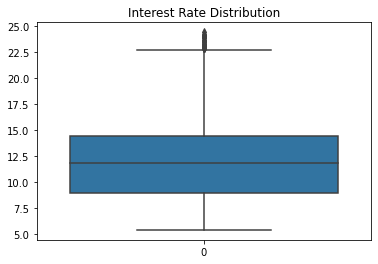

In [27]:
#using boxplot let us analyze the interest rates
sns.boxplot(data=dataframe.int_rate)
plt.title('Interest Rate Distribution')
plt.show()

**Observation:** We can see that most of the people are getting loans sanctioned between 9% to 15%, but there are few people who are taking loans at very high interest rate of 22.5% and that might be due to their bad credit history.

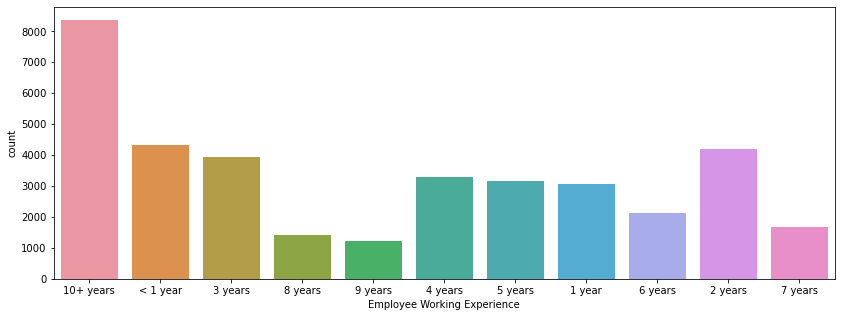

In [28]:
#Seeing the length of employment of applicants
plt.figure(figsize=(14,5))
sns.countplot(x='emp_length', data=dataframe)
plt.xlabel('Employee Working Experience')
plt.show()

**Observation:** We can see that most of the people who have experience of more than 10 years which is 10 or above 10 are taking maximum loans from the lender.

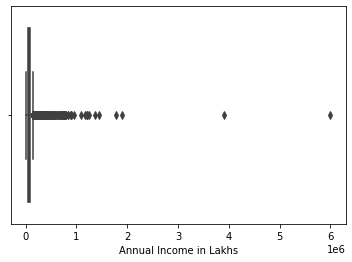

In [29]:
#Seeing the annual income of applicants
sns.boxplot(x=dataframe['annual_inc'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Observation:** Most of the poeple applying for the loans have income below 2.3 lakhs only 1% of applicants have income more than 2.35lakhs which shows us that people applying for loans have moderate income.

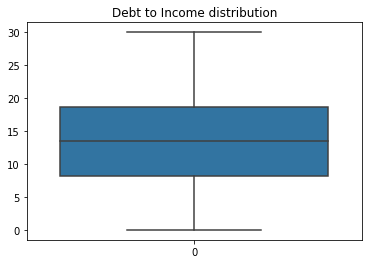

In [30]:
#boxplot for checking if any loans are being given to credit unworthy people
sns.boxplot(data=dataframe.dti)
plt.title('Debt to Income distribution')
plt.show()

**Observation:** DTI(debt to income ratio) it's the percentage of your gross monthly income (before taxes) that goes towards payments for rent, mortgage, credit cards, or other debt. In our case we see that there are no outliers which means no loans are being given to credit unworthy people which is a good point.

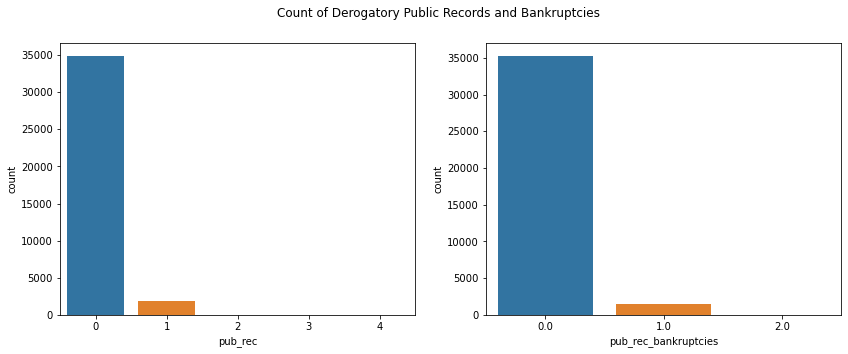

In [31]:
# countplot for derogatory public records and bankruptcies to see their impact
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(x= dataframe["pub_rec"])
plt.subplot(1,2,2)
sns.countplot(x= dataframe["pub_rec_bankruptcies"])
plt.suptitle('Count of Derogatory Public Records and Bankruptcies')
plt.show()

**Observation:** From the above plot we can clearly see that around 90% of people applying for loans neither have any public derogatory records or found guilty in public bankruptcies, which is another good point.

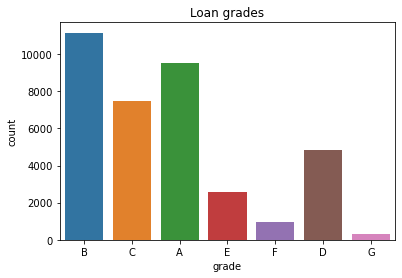

In [32]:
#Using count plot to check the graded category of loans
sns.countplot(x= dataframe["grade"])
plt.title('Loan grades')
plt.show()

**Observation:** Maximum loan taking people come under grade B or A.

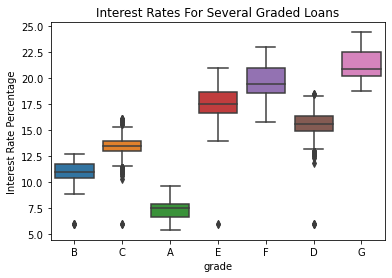

In [33]:
#let us see how interest varies for several loan grades
sns.boxplot(x='grade', y='int_rate', data=dataframe)
plt.ylabel('Interest Rate Percentage')
plt.title('Interest Rates For Several Graded Loans')
plt.show()

**Observation:** We can see that as the loan grade is going high that is A-G the interest rate is also increasing so this means the grade of loan being sanctioned to the customer directly impacts the interest he/she has to pay.

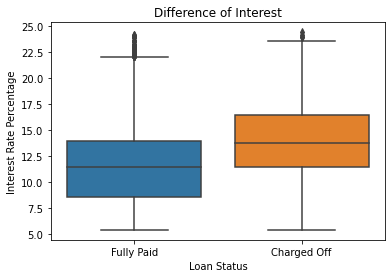

In [34]:
#using boxplot to find if there is any interest difference if the loan is fully paid or charged off
sns.boxplot(y='int_rate', x='loan_status', data=dataframe)
plt.title('Difference of Interest')
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

**Observation:** We can clearly see that when loan emi's are being paid on time and loan is being paid full the interest rate if low and when loans are being charged off the interest rates are high. This is on of the main reason banks or any financial institutions ask for paying loans on time.

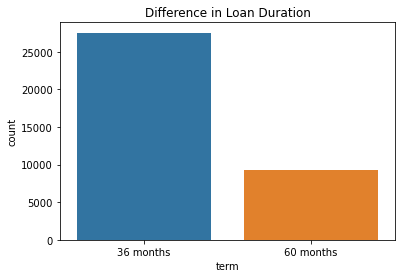

36 months    27546
60 months     9254
Name: term, dtype: int64

In [35]:
# countplot for term variable which shows the loan duration
sns.countplot(x= dataframe["term"])
plt.title('Difference in Loan Duration')
plt.show()
dataframe["term"].value_counts()

**Observation:** Most of the people applying for loans are option for 36th months loan tenure than 60 months which clearly shows people applying for loans are cautious regarding the interest inflation.

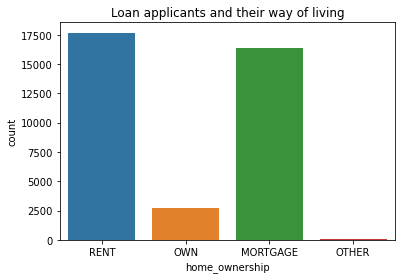

RENT        17667
MORTGAGE    16334
OWN          2703
OTHER          96
Name: home_ownership, dtype: int64

In [36]:
# countplot for home_ownership variable
sns.countplot(x= dataframe["home_ownership"])
plt.title('Loan applicants and their way of living')
plt.show()
dataframe["home_ownership"].value_counts()

**Observation:** We can see that most of people taking loans are either living in a rented house or have their house under mortgage which will indirectly effect their monthly expenditure compared to people living in own house.

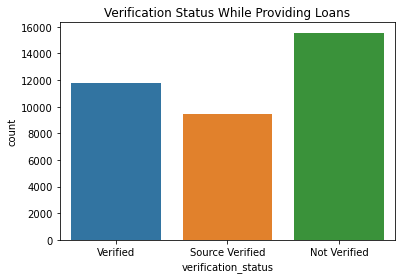

Not Verified       15554
Verified           11763
Source Verified     9483
Name: verification_status, dtype: int64

In [37]:
# countplot for verification status while providing loans
sns.countplot(x= dataframe["verification_status"])
plt.title('Verification Status While Providing Loans')
plt.show()
dataframe["verification_status"].value_counts()

**Observation:** The above countplot clearly shows that high number of loans are being sanctioned without verifying the applicants status which is a drawback and can indirectly lead to huge number of defaulters if continued.

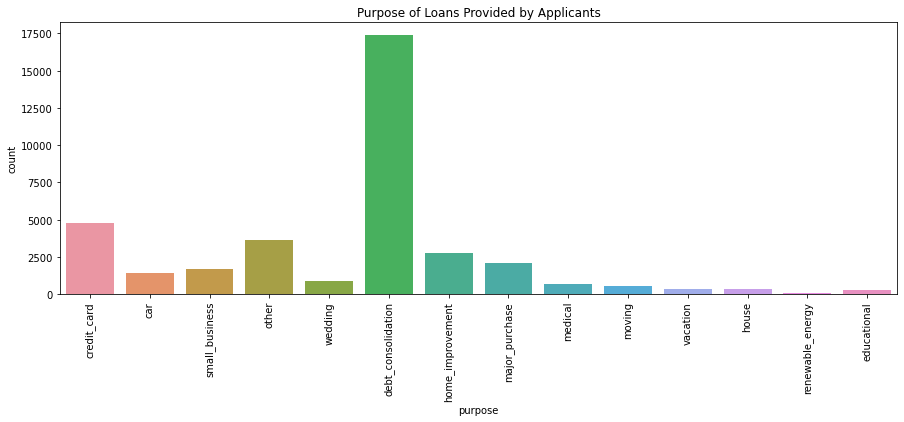

In [38]:
# countplot for purpose of loans provided by applicants
plt.figure(figsize=(15,5))
sns.countplot(x= dataframe["purpose"])
plt.title('Purpose of Loans Provided by Applicants')
plt.xticks(rotation=90)
plt.show()

**Observation:** We can clearly see that most of loans are being taken by customers for debt consolidation and if this continues with same trend most of the customers will be the ones who are in high debt and will indirectly effect the charged off loans percentage.

# Segmented Univariate Analysis

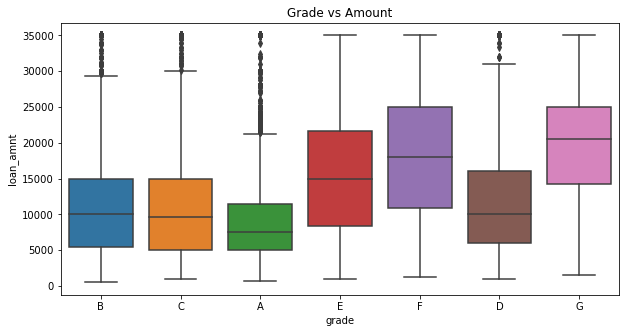

In [39]:
#let us see grade vs amount distribution
plt.figure(figsize=(10,5))
sns.boxplot(x='grade', y=dataframe.loan_amnt, data=dataframe)
plt.title('Grade vs Amount')
plt.show()

**Observation:** As grades are increasing from A-G the amount taken under the loan is also increasing either highly or slightly.

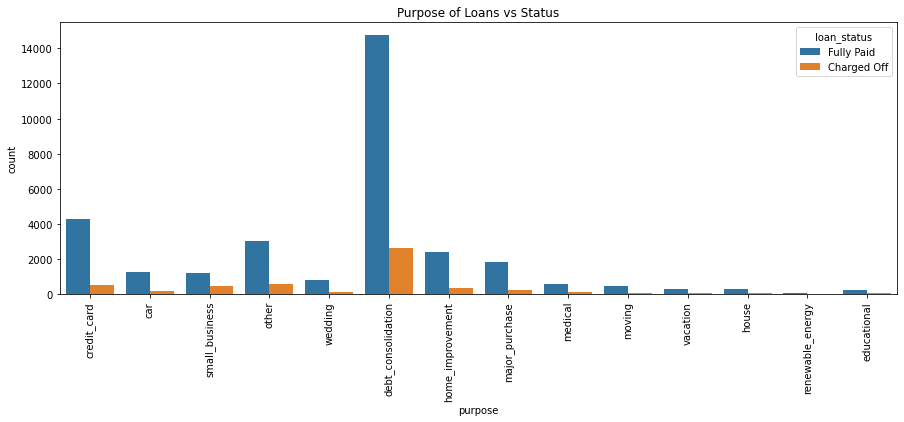

In [40]:
#let us see purpose of loan vs status of loan distribution
plt.figure(figsize=(15,5))
sns.countplot(x='purpose', hue="loan_status", data=dataframe)
plt.xticks(rotation=90)
plt.title('Purpose of Loans vs Status')
plt.show()

**Observation:** People taking loans for debt consolidatio are in huge number but the good point is they are also clearing their loans.

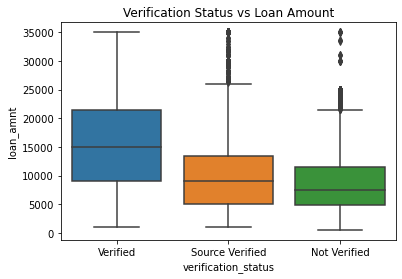

In [41]:
##let us see verification status vs loan amount distribution
sns.boxplot(x='verification_status', y=dataframe.loan_amnt, data=dataframe)
plt.title('Verification Status vs Loan Amount')
plt.show()

**Observation:** It is observed that verified applicants tend to get higher loan amounts where as not verified people tend to get less loan amounts which is a good sign while comparing this with univariate verification status plot.

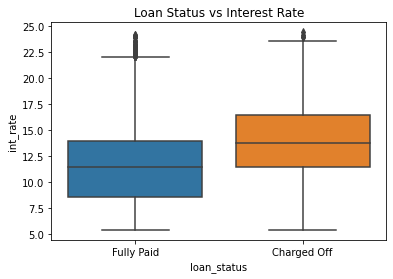

In [42]:
##let us see loan status vs interest rate distribution
sns.boxplot(x='loan_status', y=dataframe.int_rate, data=dataframe)
plt.title('Loan Status vs Interest Rate')
plt.show()

**Observation:** The above plot is showing that the higher amount of interest charged by lender is proportional to higher amounts of loan being charged off. 

# Bivariate Analysis

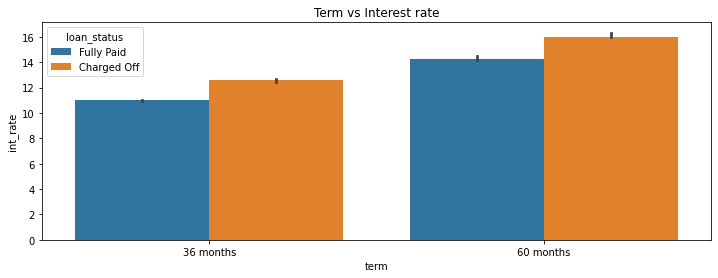

In [43]:
#let us see term vs interest rate distribution
plt.figure(figsize=(12,4))
sns.barplot(x='term', y='int_rate', hue='loan_status', data=dataframe, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observation:** It is clearly observed that the higher interest rate the higher loans are charged off in both the terms.

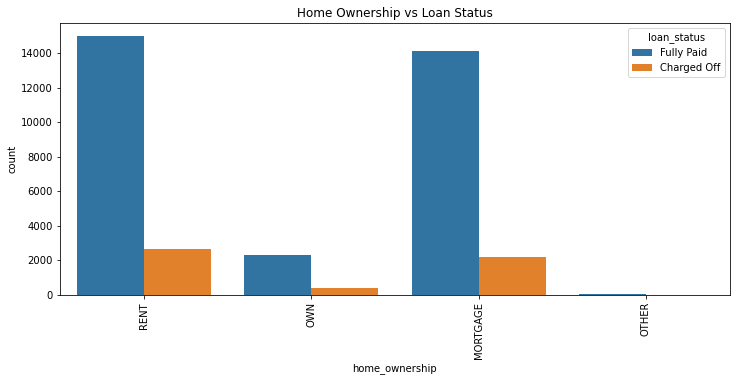

In [44]:
#let us see home ownership vs loan status distribution
plt.figure(figsize=(12,5))
sns.countplot(x='home_ownership',hue='loan_status', data=dataframe)
plt.title('Home Ownership vs Loan Status')
plt.xticks(rotation=90)
plt.show()

**Observation:** People with own house are taking less loans and most of them are paying loans and only few of them are defaulters where as people with rented house or mortgage houses are taking more loans and around 10% of them are turning into defaulters.

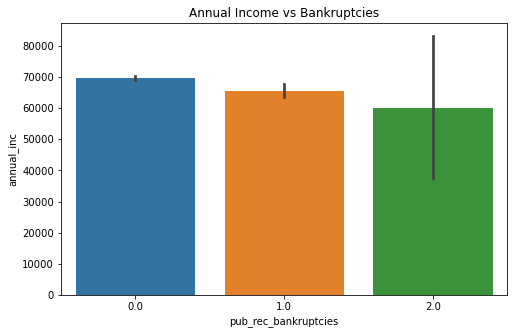

In [45]:
#let us see annual income vs bankruptcies distribution
plt.figure(figsize=(8,5))
sns.barplot(x='pub_rec_bankruptcies', y='annual_inc', data=dataframe)
plt.title('Annual Income vs Bankruptcies')
plt.show()

**Observation:** Bankruptcies are more when the annual income is less.

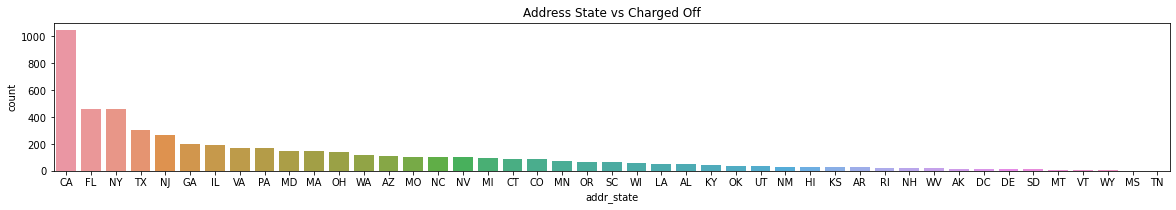

In [46]:
#Let us find out which states have more defaulters
charged_off_df = dataframe[dataframe.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')
plt.show()

**Observation:** We see there are high number of defaulters from the state of CA.

# Correlation Matrix

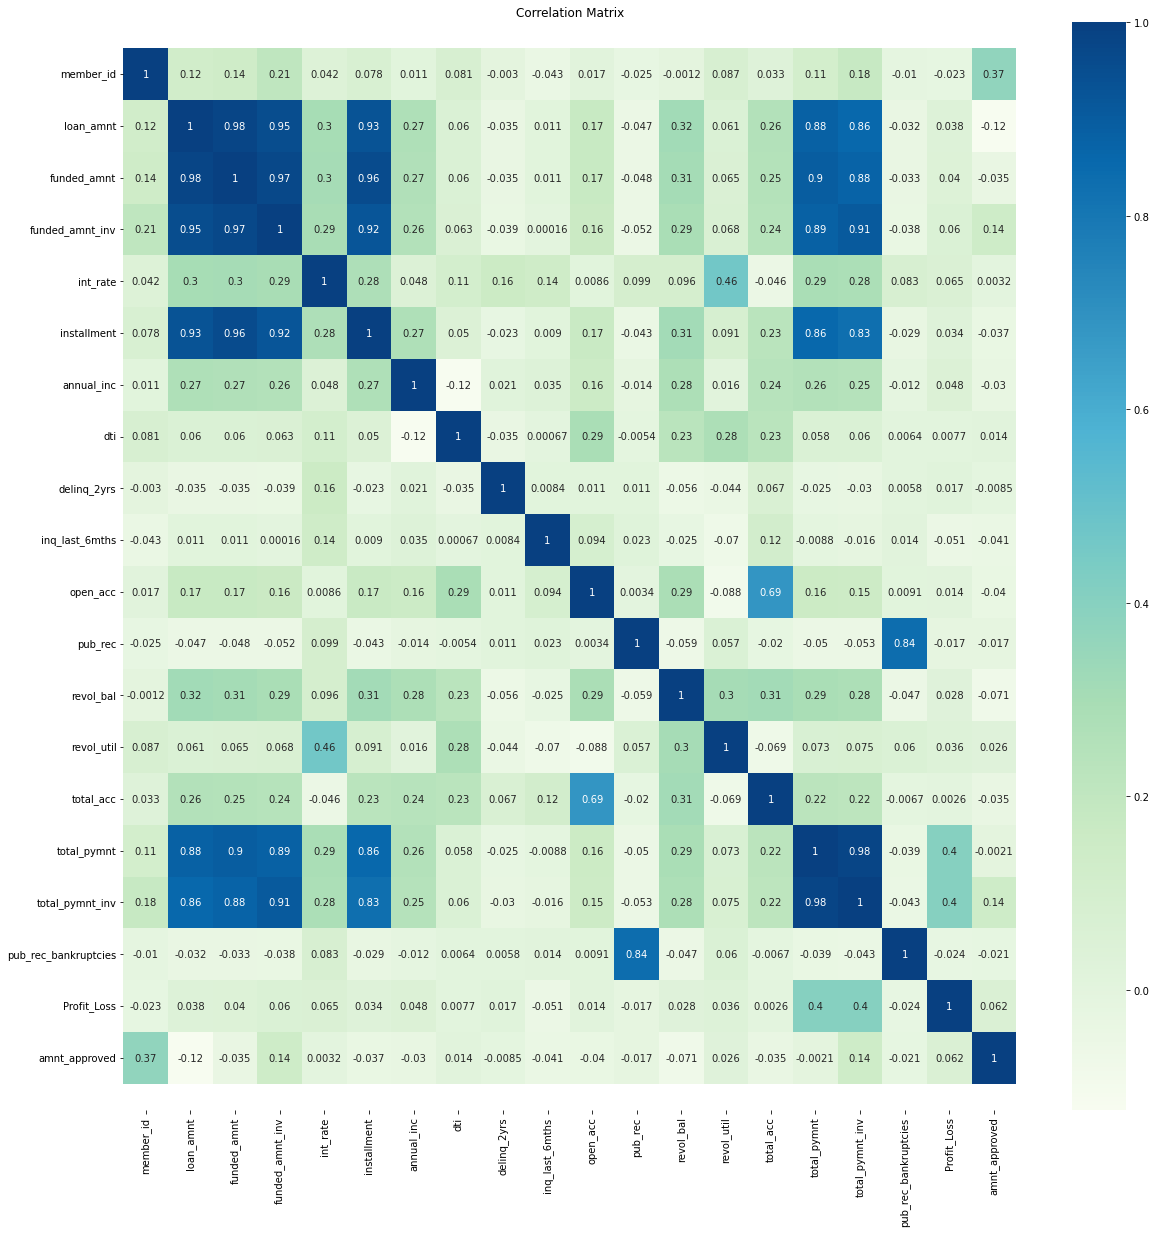

In [53]:
#spotting the correlation matrix
correlation_matrix = dataframe.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matrix on a heat map
ax = sns.heatmap(correlation_matrix, annot = True, cmap='GnBu')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation Matrix")
plt.show()

**Observations:** 
- The public derogatory records are highly (+ve) correlated with public bankruptcies records. 
- Interest rates are high for people with high revolving line utilization rate.   

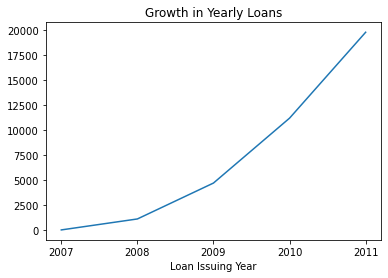

In [48]:
growth = dataframe.groupby('issue_d_year')['loan_status'].count()

growth.plot.line(x_compat=True)
plt.xticks(np.arange(min(growth.index), max(growth.index)+1, 1.0))
plt.title('Growth in Yearly Loans')
plt.xlabel('Loan Issuing Year')
plt.show()

**Observation:** The growth of loans sactioned are significantly rising every year.

## Conclusion

- Grading system is very good for identifying customers and their payment model.
- Lending club should check the amount of loans being issued to specific state and neutralize it.
- Providing small business loans should be taken care may be including some market analysts who can analyze the small business idea and see how far it can be profitable or atleast how much % of loan can we get back.
- Providing loans to people with bankruptcies records are a risky step and it should be avoided to maintain credit profit and loss.